In [1]:
n <- 300
x <- rchisq(n, 3)
y <- 0.7 * x + rnorm(n, sd=3)

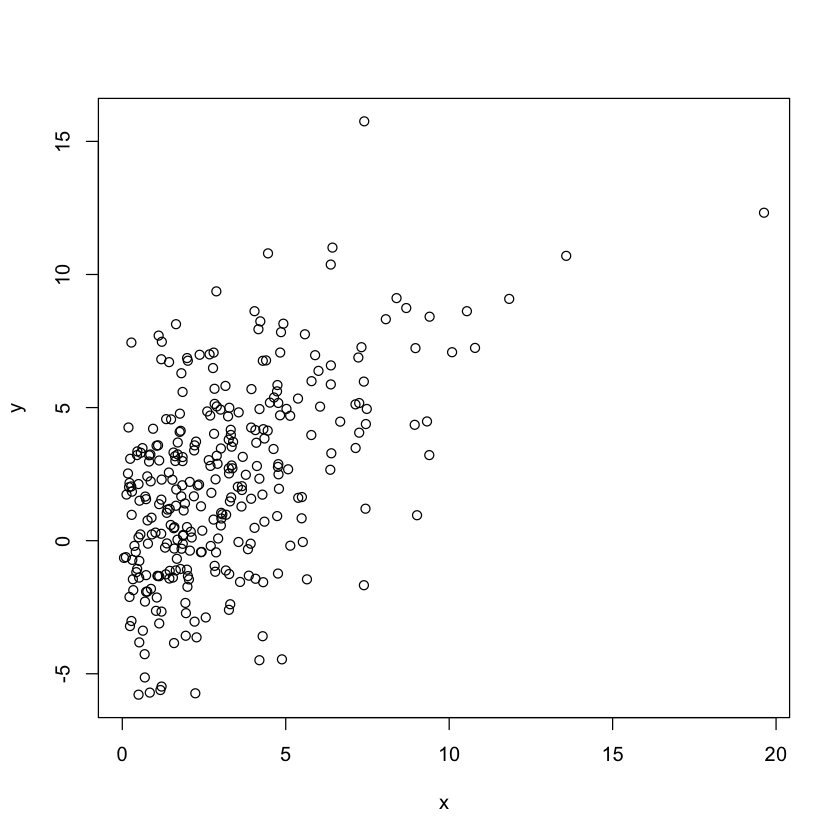

In [2]:
plot(x, y)

In [3]:
predict <- function(x, theta) {
  theta*x
}

In [4]:
sse <- function(prediction, actual) {
  sum((prediction - actual)^2)
}

In [5]:
test.theta <- function(x, y, theta, plt=T) {
  y <- y[order(x)]
  x <- x[order(x)]
  preds <- predict(x, theta)
  loss <- sse(preds, y)
  if (plt) {
    plot(x, y)
    lines(x, preds, col=2)
    legend('topleft', legend=round(loss))
  }
  loss
}

[1] 5282.047

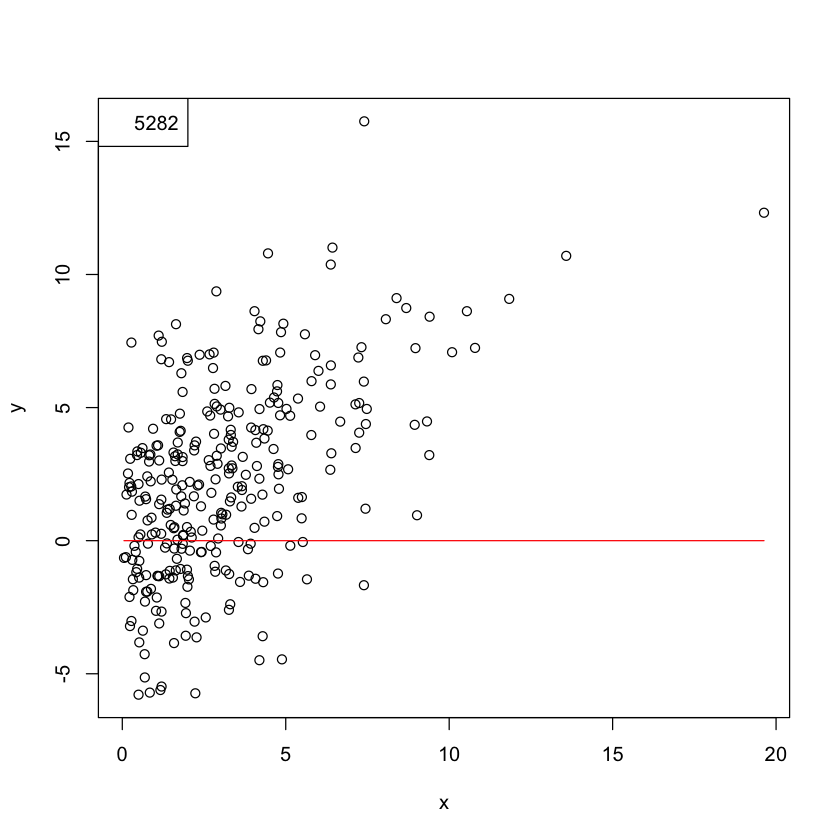

In [6]:
test.theta(x, y, 0)

[1] 2972.6

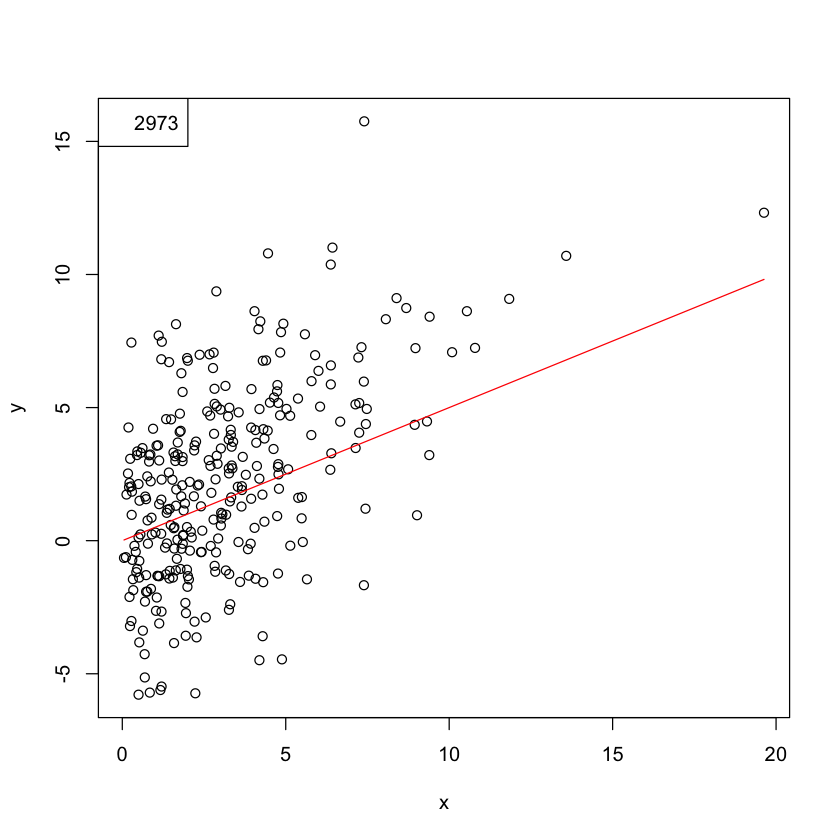

In [7]:
test.theta(x, y, 0.5)

[1] 3106.916

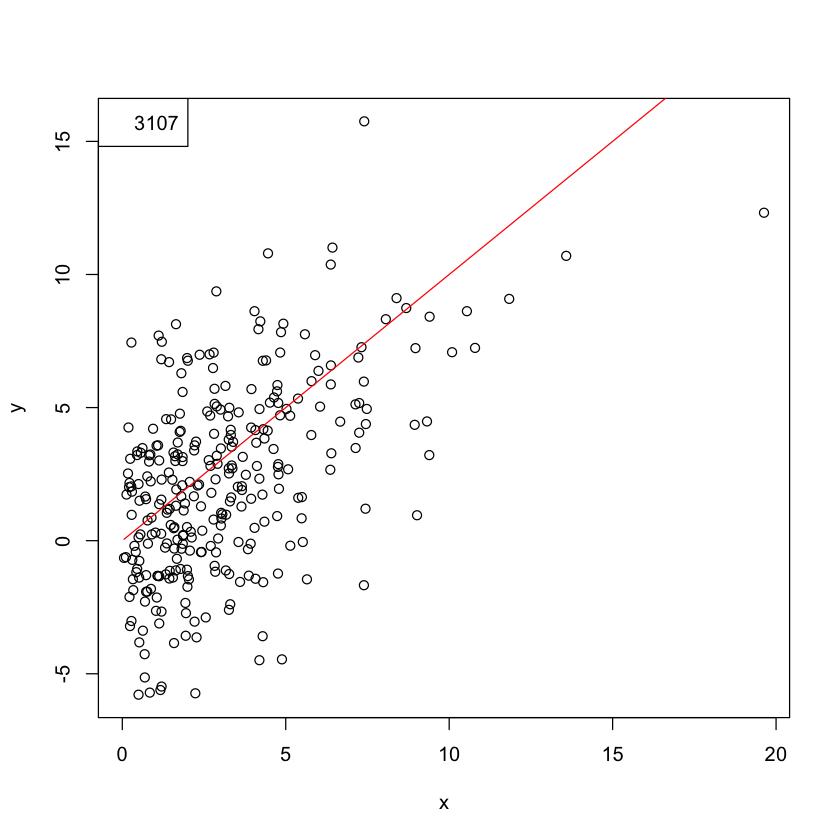

In [8]:
test.theta(x, y, 1)

In [9]:
N_THETAS <- 100
thetas <- seq(0, 2, length=N_THETAS)
errors <- numeric(N_THETAS)

for (i in 1:N_THETAS) {
  theta <- thetas[i]
  error <- test.theta(x, y, theta, plt=F)
  errors[i] <- error
}

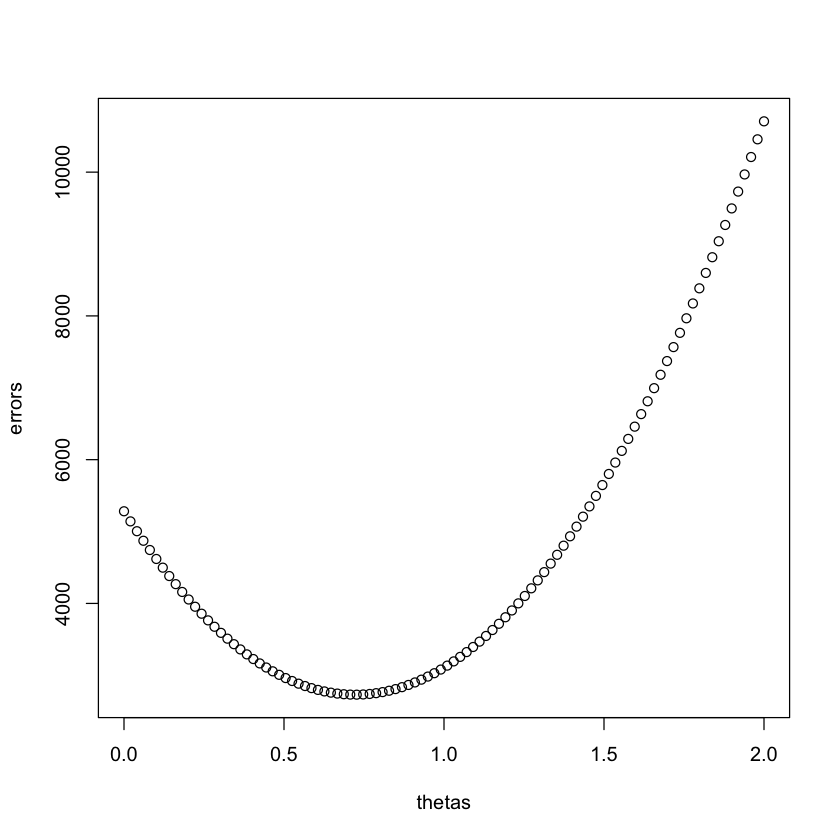

In [10]:
plot(thetas, errors)

In [11]:
min(errors)

[1] 2730.707

In [12]:
thetas[which(errors == min(errors))]

[1] 0.7272727

[1] 2740.573

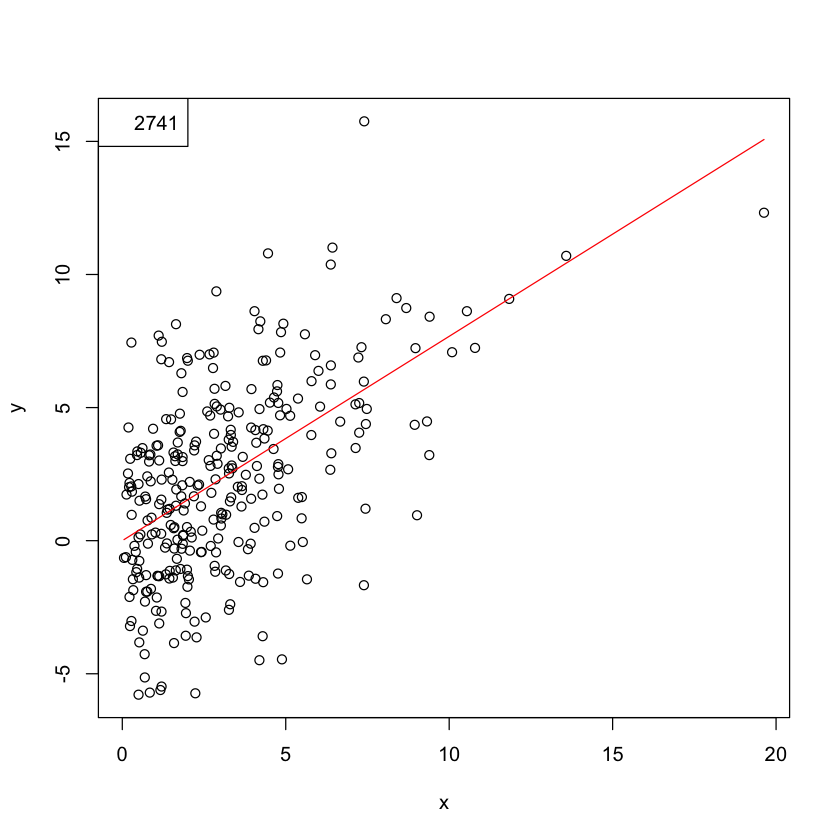

In [13]:
test.theta(x, y, 0.7677)

# Two Parameters

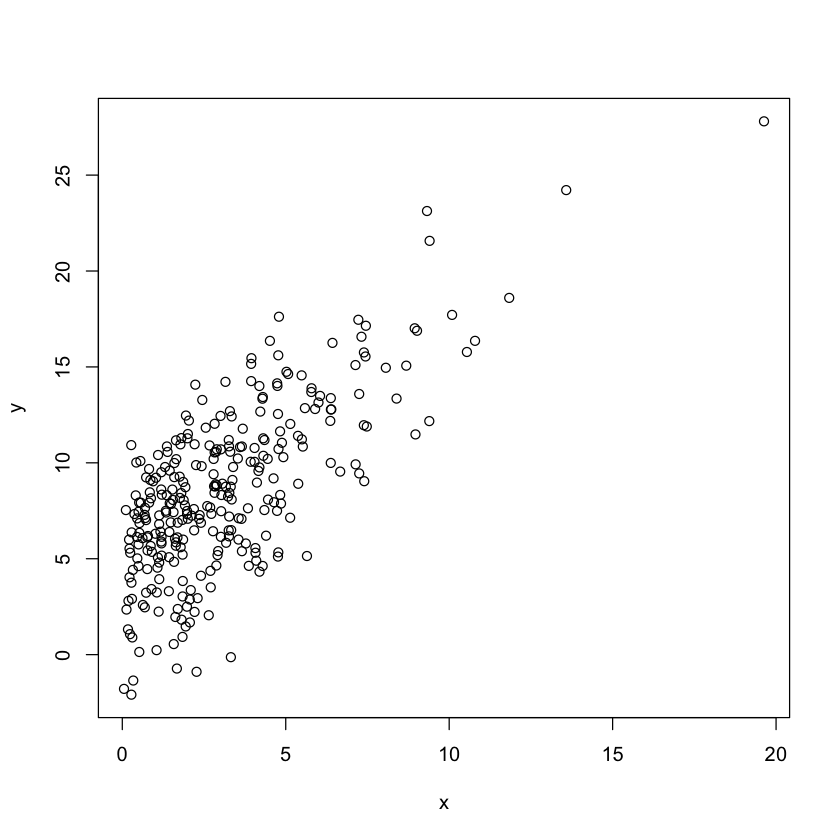

In [14]:
y <- 4.48 + 1.27 * x + rnorm(n, sd=3)
plot(x, y)

In [15]:
predict <- function(x, theta) {
  theta[1] + theta[2]*x
}

[1] 27725.27

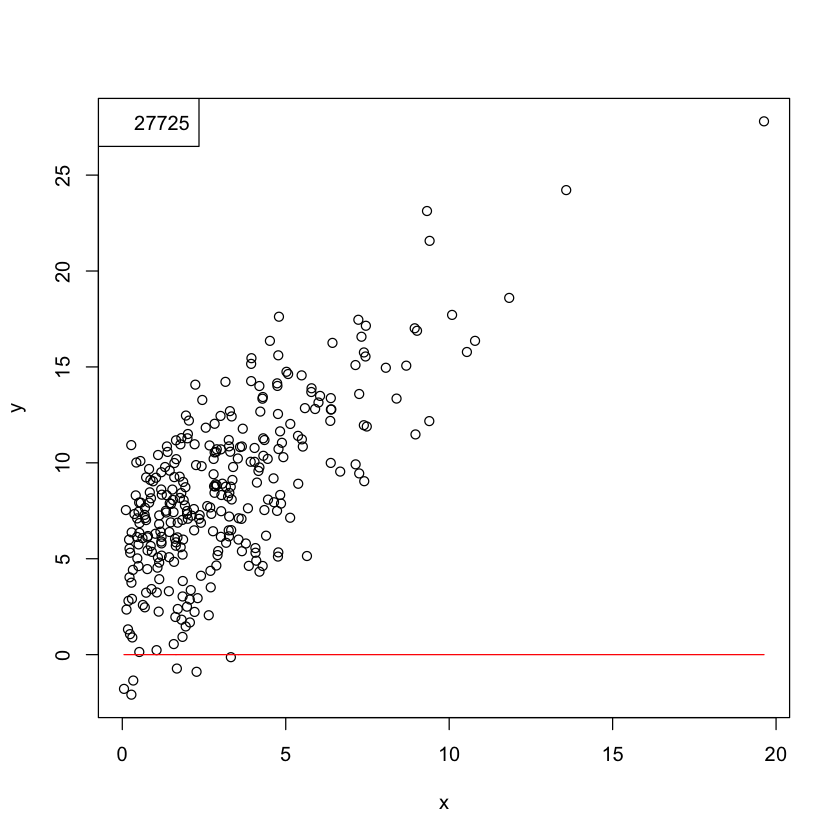

In [16]:
test.theta(x, y, c(0, 0))

[1] 11765.72

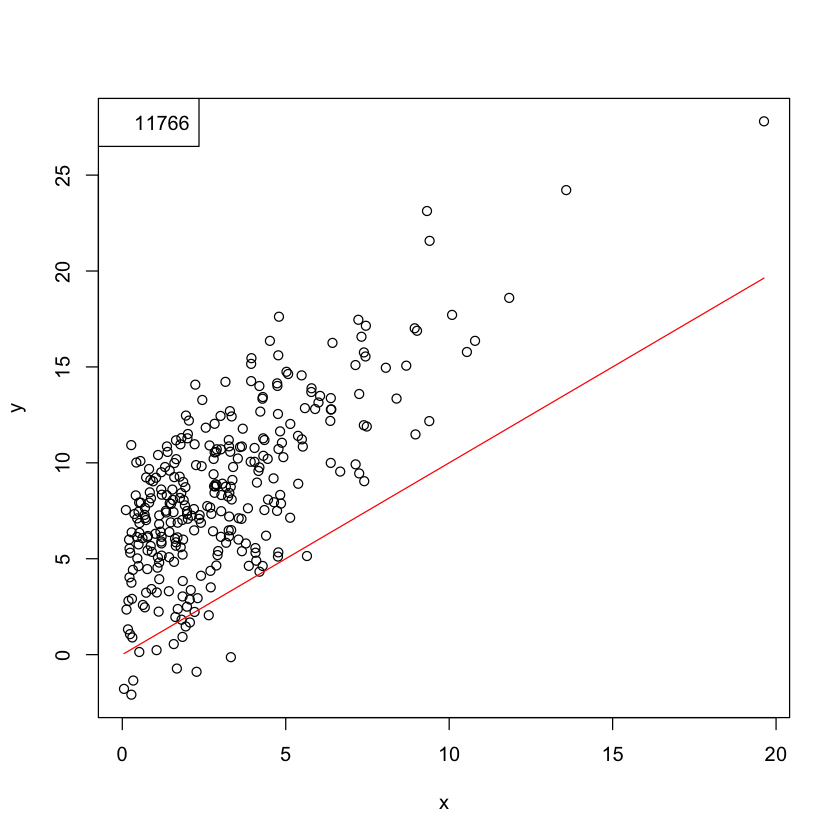

In [17]:
test.theta(x, y, c(0, 1))

[1] 8808.436

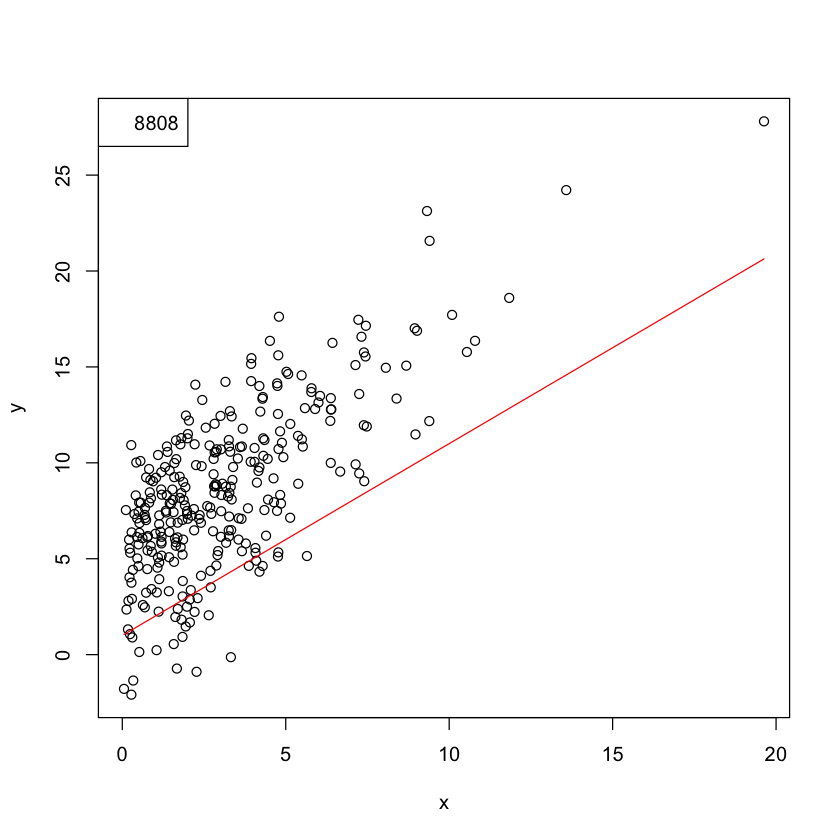

In [18]:
test.theta(x, y, c(1, 1))

In [19]:
intercepts <- seq(0, 10, length=100)
slopes <- seq(0, 2, length=100)
errors <- matrix(NA, 100, 100)

for (i in 1:length(intercepts)) {
  for (m in 1:length(slopes)) {
    theta <- c(intercepts[i], slopes[m])
    error <- test.theta(x, y, theta, plt=F)
    errors[i, m] <- error
  }
}

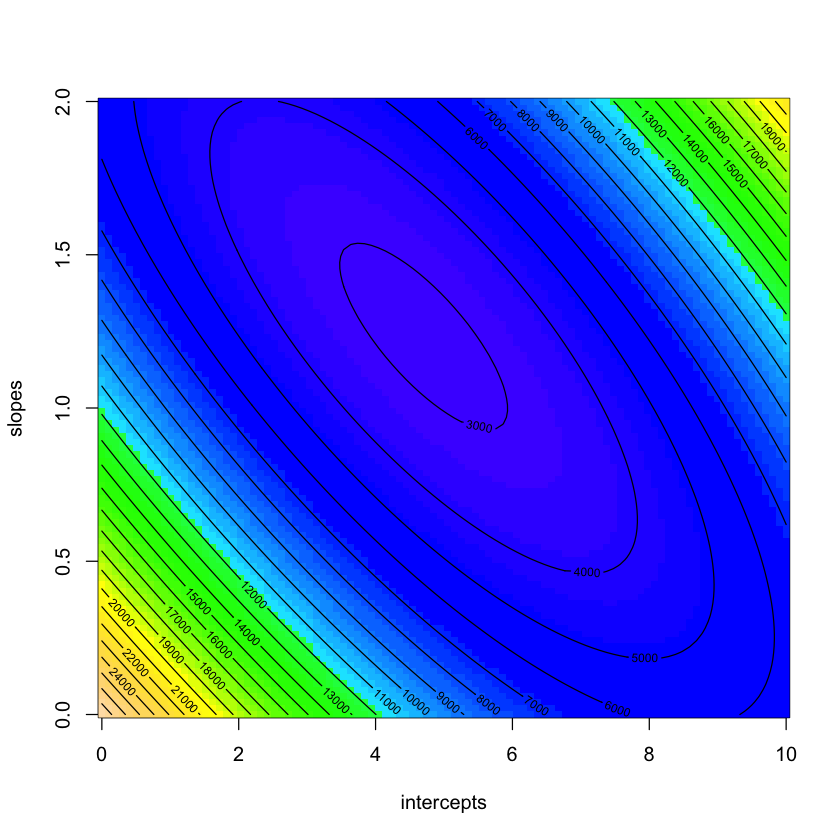

In [20]:
image(intercepts, slopes, errors, col=topo.colors(50))
contour(intercepts, slopes, errors, add=T, nlevels=20)

In [21]:
min(errors)

[1] 2817.441

In [22]:
(idx <- which(errors == min(errors)))

[1] 6148

In [23]:
(m <- trunc(idx / 100) + 1)
(i <- idx %% 100)

[1] 62

[1] 48

In [24]:
errors[i, m]

[1] 2817.441

In [25]:
theta <- c(intercepts[i], slopes[m])
theta

[1] 4.747475 1.232323

In [ ]:
test.theta(x, y, theta)

# Gradient Descent...
Explain on paper.